<a href="https://colab.research.google.com/github/Talha-Naeem/DeepLearning-Works/blob/master/Ch5_pretrained_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
#!ls -ahl drive/My\ Drive|grep dogs
!unzip "drive/My Drive/dogs-vs-cats.zip" 
#sourceZipFile = "drive/My Drive/dogs-vs-cats.zip"
#print(os.path.exists(sourceZipFile))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content
Archive:  drive/My Drive/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip train.zip
#!unzip test1.zip
!mkdir source_data
!mv train source_data
#!mv test1 source_data
#!mv sampleSubmission.csv source_data

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [ ]:
!rm -Rf cats_and_dogs_small

In [ ]:
#!mv source_data/test1 source_data/test
!ls source_data/train

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
import os, shutil
def createIfNot(pathName):
    if os.path.exists(pathName):
        print(pathName, " Already Exists")
    else:
        os.mkdir(pathName)

original_dataset_dir = 'source_data/train'

modelStoragePath = "drive/My Drive/"

base_dir = 'cats_and_dogs_small'
createIfNot(base_dir)
train_dir = os.path.join(base_dir, 'train')
createIfNot(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
createIfNot(validation_dir)
test_dir = os.path.join(base_dir, 'test')
createIfNot(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
createIfNot(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
createIfNot(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
createIfNot(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
createIfNot(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
createIfNot(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
createIfNot(test_dogs_dir)

In [ ]:
#cats pictures for training
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
print(fnames[1], fnames[10])

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    print(src)
    dst = os.path.join(train_cats_dir, fname)
    print(dst)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
#getting 1000 dogs pics for traing
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#getting 500 dogs pics for testing
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#getting 500 dogs pics for validation
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

cat.1.jpg cat.10.jpg
source_data/train/cat.0.jpg
cats_and_dogs_small/train/cats/cat.0.jpg
source_data/train/cat.1.jpg
cats_and_dogs_small/train/cats/cat.1.jpg
source_data/train/cat.2.jpg
cats_and_dogs_small/train/cats/cat.2.jpg
source_data/train/cat.3.jpg
cats_and_dogs_small/train/cats/cat.3.jpg
source_data/train/cat.4.jpg
cats_and_dogs_small/train/cats/cat.4.jpg
source_data/train/cat.5.jpg
cats_and_dogs_small/train/cats/cat.5.jpg
source_data/train/cat.6.jpg
cats_and_dogs_small/train/cats/cat.6.jpg
source_data/train/cat.7.jpg
cats_and_dogs_small/train/cats/cat.7.jpg
source_data/train/cat.8.jpg
cats_and_dogs_small/train/cats/cat.8.jpg
source_data/train/cat.9.jpg
cats_and_dogs_small/train/cats/cat.9.jpg
source_data/train/cat.10.jpg
cats_and_dogs_small/train/cats/cat.10.jpg
source_data/train/cat.11.jpg
cats_and_dogs_small/train/cats/cat.11.jpg
source_data/train/cat.12.jpg
cats_and_dogs_small/train/cats/cat.12.jpg
source_data/train/cat.13.jpg
cats_and_dogs_small/train/cats/cat.13.jpg
sourc

In [ ]:
#Extracting features using the pretrained convolutional base

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
      features_batch = conv_base.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= sample_count:
        break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#Defining and training the densely connected classifier

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 7ms/step - loss: 0.5999 - acc: 0.6865 - val_loss: 0.5514 - val_acc: 0.7000
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4482 - acc: 0.7945 - val_loss: 0.4376 - val_acc: 0.7860
Epoch 3/30
100/100 [==============================] - 1s 5ms/step - loss: 0.3591 - acc: 0.8465 - val_loss: 0.4599 - val_acc: 0.7560
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3263 - acc: 0.8550 - val_loss: 0.3780 - val_acc: 0.8200
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2872 - acc: 0.8855 - val_loss: 0.3591 - val_acc: 0.8460
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2702 - acc: 0.8925 - val_loss: 0.2804 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2506 - acc: 0.8970 - val_loss: 0.2887 - val_acc: 0.8780
Epoch 8/30
100/100 [==============================] - 1s 5ms/step - loss: 0.

In [ ]:
#Plotting the results

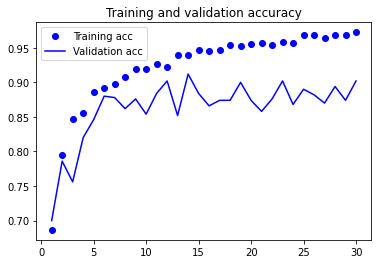

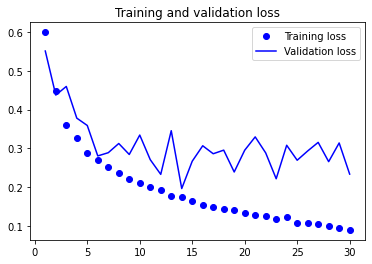

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#Adding a densely connected classifier on top of the convolutional base

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
#Training the model end to end with a frozen convolutional base

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 27s 268ms/step - loss: 0.5861 - acc: 0.6965 - val_loss: 0.3110 - val_acc: 0.9000
Epoch 2/30
100/100 [==============================] - 27s 267ms/step - loss: 0.4844 - acc: 0.7740 - val_loss: 0.3260 - val_acc: 0.8610
Epoch 3/30
100/100 [==============================] - 27s 266ms/step - loss: 0.4201 - acc: 0.8195 - val_loss: 0.5182 - val_acc: 0.7140
Epoch 4/30
100/100 [==============================] - 27s 267ms/step - loss: 0.4114 - acc: 0.8170 - val_loss: 0.2155 - val_acc: 0.9170
Epoch 5/30
100/100 [==============================] - 27s 268ms/step - loss: 0.3777 - acc: 0.8320 - val_loss: 0.2531 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 27s 268ms/step - loss: 0.3749 - acc: 0.8415 - val_loss: 0.2115 - val_acc: 0.9110
Epoch 7/30
100/100 [===========

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

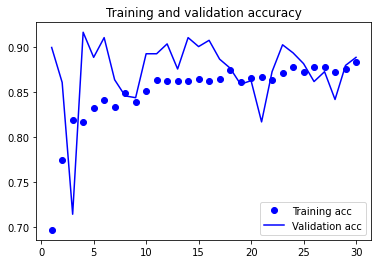

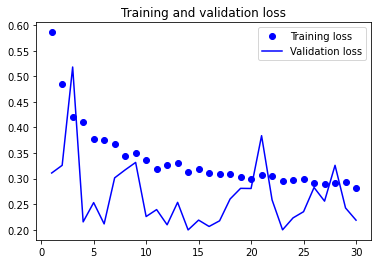

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#Freezing all layers up to a specific one

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
#Fine-tuning the model

In [ ]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 28s 279ms/step - loss: 0.0982 - acc: 0.9660 - val_loss: 0.2548 - val_acc: 0.8960
Epoch 2/100
100/100 [==============================] - 28s 277ms/step - loss: 0.0833 - acc: 0.9645 - val_loss: 0.1501 - val_acc: 0.9460
Epoch 3/100
100/100 [==============================] - 28s 279ms/step - loss: 0.0817 - acc: 0.9690 - val_loss: 0.2231 - val_acc: 0.9080
Epoch 4/100
100/100 [==============================] - 28s 277ms/step - loss: 0.0806 - acc: 0.9690 - val_loss: 0.1191 - val_acc: 0.9520
Epoch 5/100
100/100 [==============================] - 28s 278ms/step - loss: 0.0718 - acc: 0.9715 - val_loss: 0.0681 - val_acc: 0.9780
Epoch 6/100
100/100 [==============================] - 28s 278ms/step - loss: 0.0920 - acc: 0.9640 - val_loss: 0.1285 - val_acc: 0.9510
Epoch 7/100
100/100 [==============================] - 28s 277ms/step - loss: 0.0599 - acc: 0.9790 - val_loss: 0.0939 - val_acc: 0.9670
Epoch 8/100
100/100 [===========================

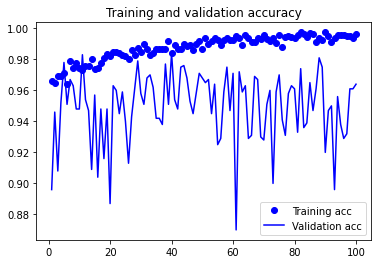

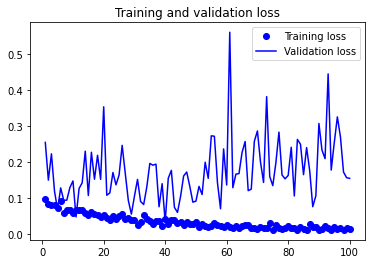

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#Smoothing the plots

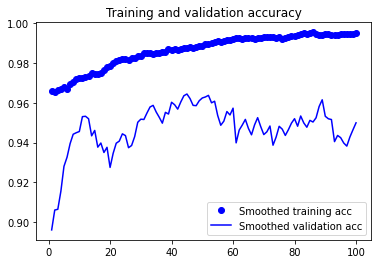

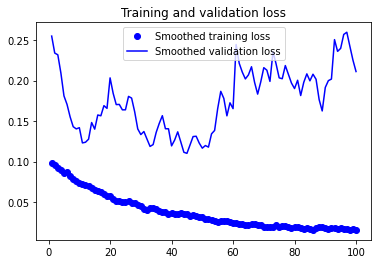

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.9330000281333923


In [ ]:
import pickle
def saveData(model, history, iteration):
    modelFile = modelStoragePath + "model_cats_dogs_small" + str(iteration).strip() + ".h5"
    #historyFile = modelStoragePath + "History_cats_and_dogs_small" + str(iteration).strip() + ".pkle"
    model.save(modelFile)

In [ ]:
#Visualizing intermediate activations

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('drive/My Drive/model_cats_dogs_small1.h5')

In [ ]:
#Preprocessing a single image

In [ ]:
img_path = 'cats_and_dogs_small/test/cats/cat.1615.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


In [ ]:
#Displaying the test picture

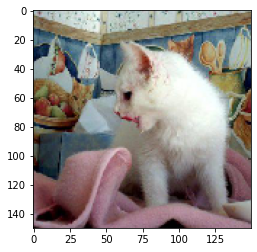

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
#Instantiating a model from an input tensor and a list of output tensors

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:8]]

In [ ]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
#Running the model in predict mode

In [ ]:
activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


In [ ]:
#Visualizing the fourth channel

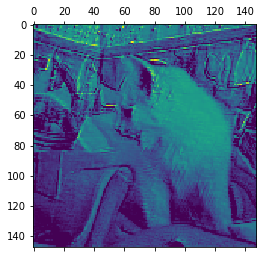

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

In [ ]:
#Visualizing the seventh channel

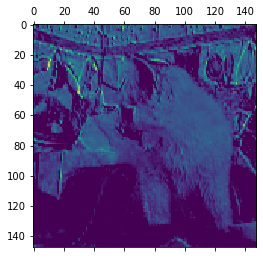

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

In [ ]:
#Visualizing every channel in every intermediate activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

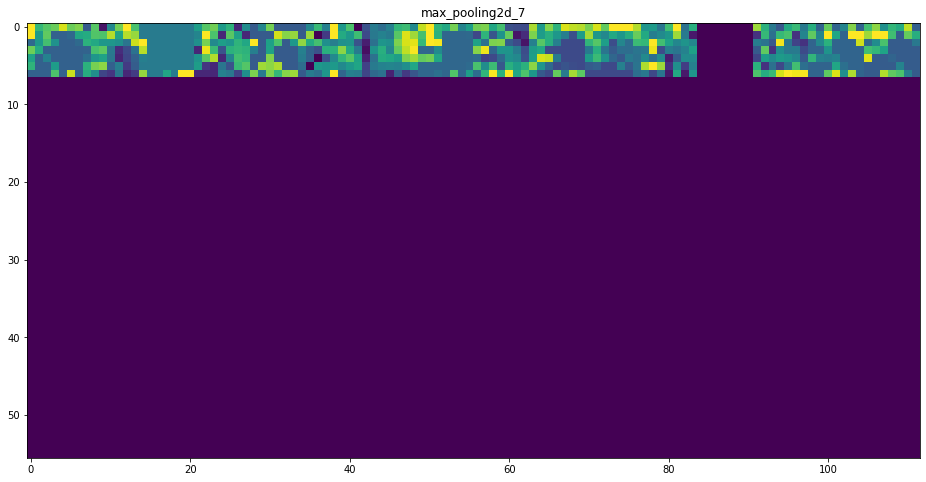

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

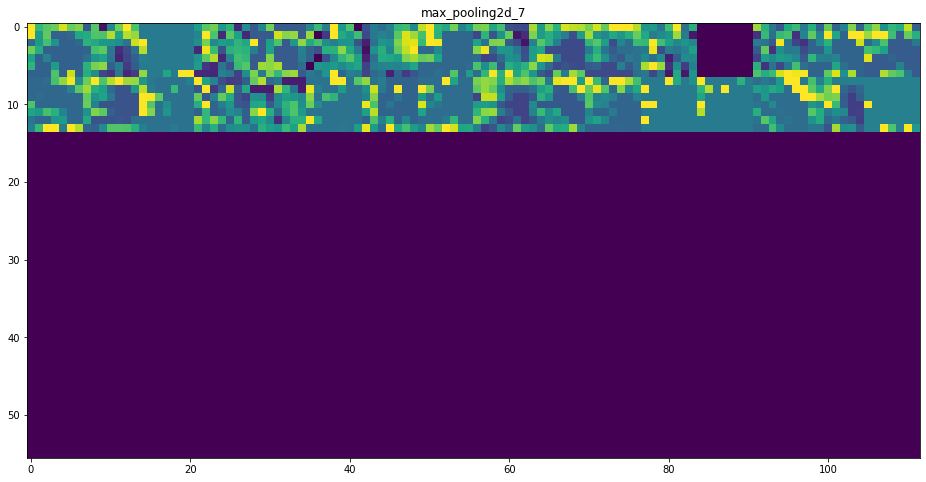

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

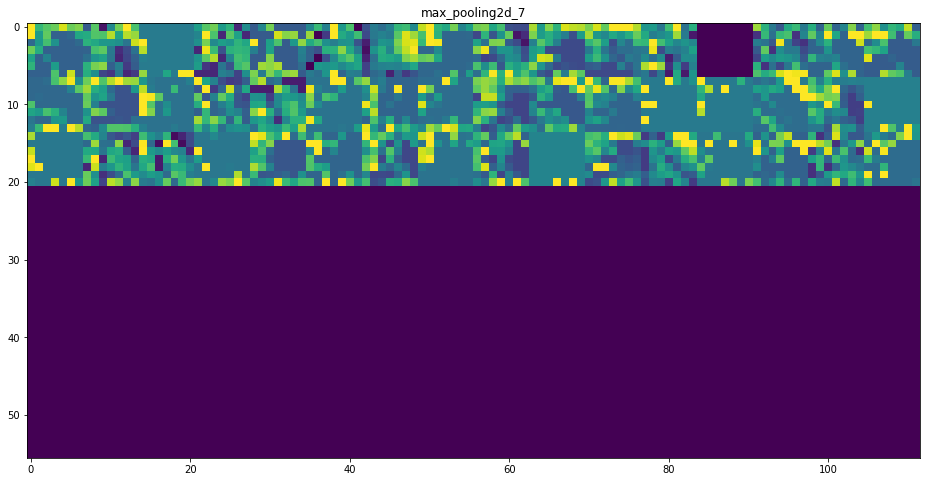

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

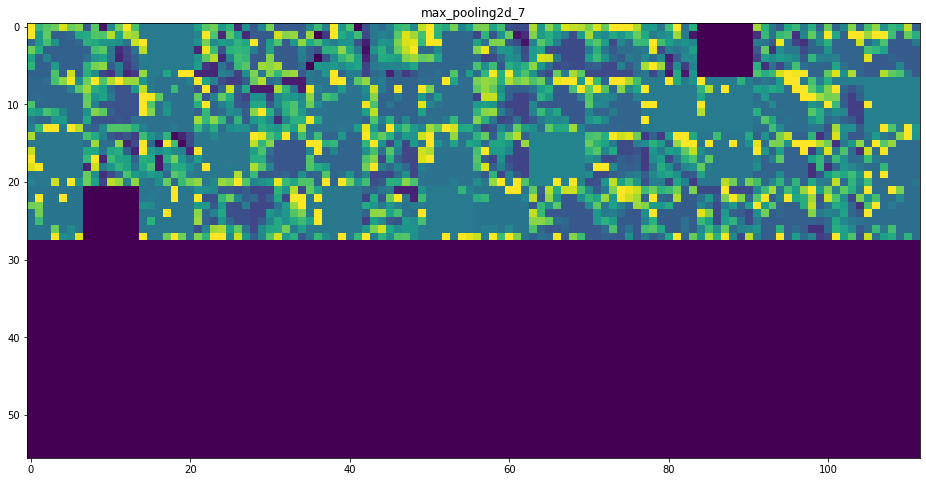

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

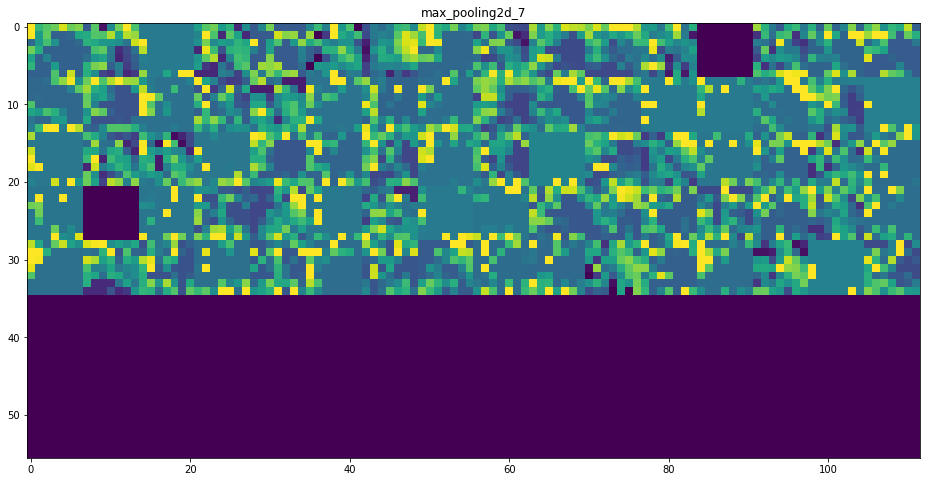

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

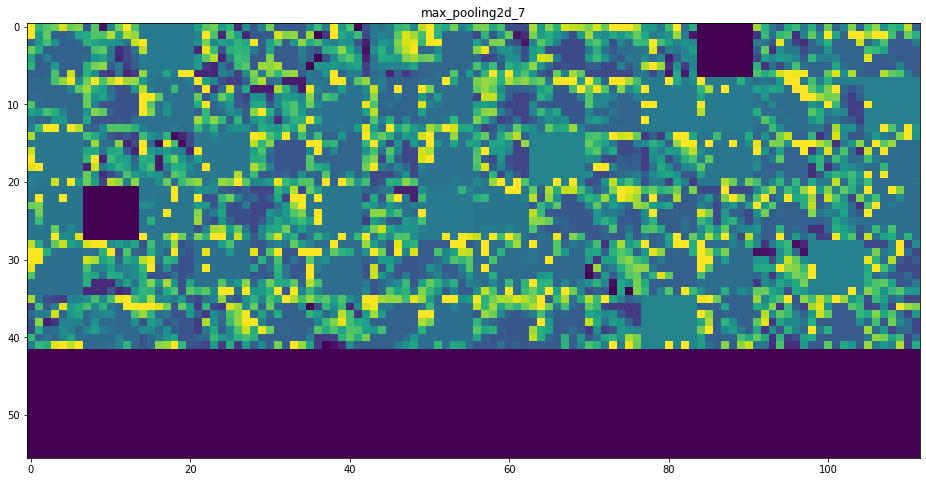

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

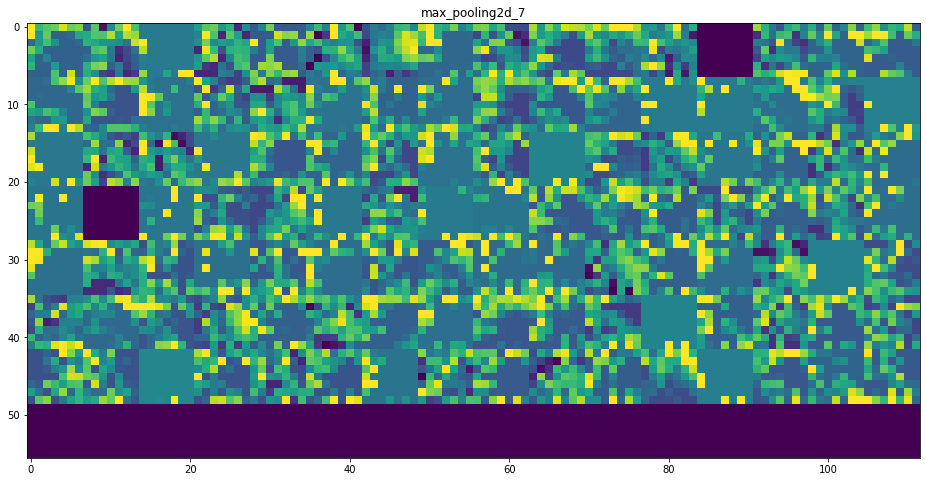

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

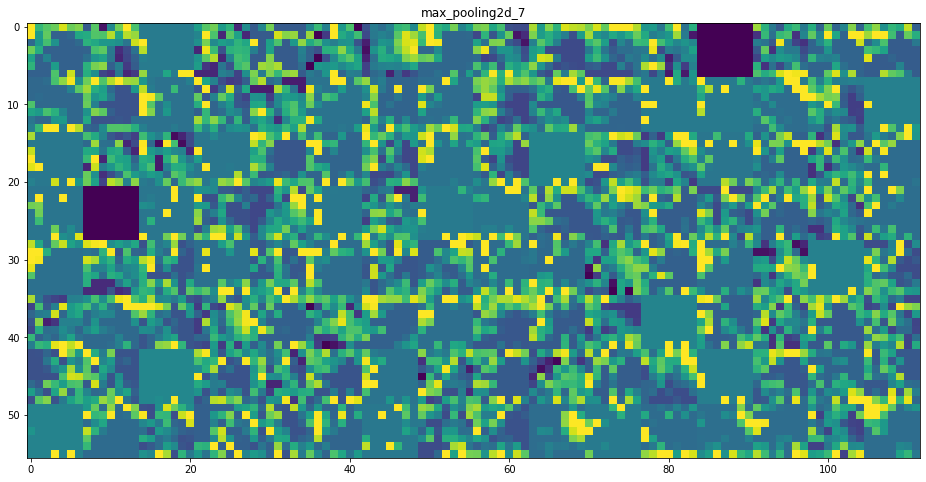

In [ ]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
  images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
for col in range(n_cols):
  for row in range(images_per_row):
    channel_image = layer_activation[0,
    :, :,
    col * images_per_row + row]
    channel_image -= channel_image.mean()
    channel_image /= channel_image.std()
    channel_image *= 64
    channel_image += 128
    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
    display_grid[col * size : (col + 1) * size,
    row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
  scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
#Defining the loss tensor for filter visualization

In [ ]:
from keras.applications import VGG16
from keras import backend as K
model = VGG16(weights='imagenet',
include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [ ]:
#5.33 Obtaining the gradient of the loss with regard to the input

In [ ]:
grads = K.gradients(loss, model.input)[0]

In [ ]:
#Gradient-normalization trick

In [ ]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [ ]:
#Fetching Numpy output values given Numpy input values

In [ ]:
iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [ ]:
#Loss maximization via stochastic gradient descent

In [ ]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
  loss_value, grads_value = iterate([input_img_data])
  input_img_data += grads_value * step

In [ ]:
#Utility function to convert a tensor into a valid image

In [ ]:
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  x += 0.5
  x = np.clip(x, 0, 1)
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [ ]:
#Function to generate filter visualizations

In [ ]:
def generate_pattern(layer_name, filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])
  grads = K.gradients(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  iterate = K.function([model.input], [loss, grads])
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

In [ ]:
#Generating a grid of all filter response patterns in a layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


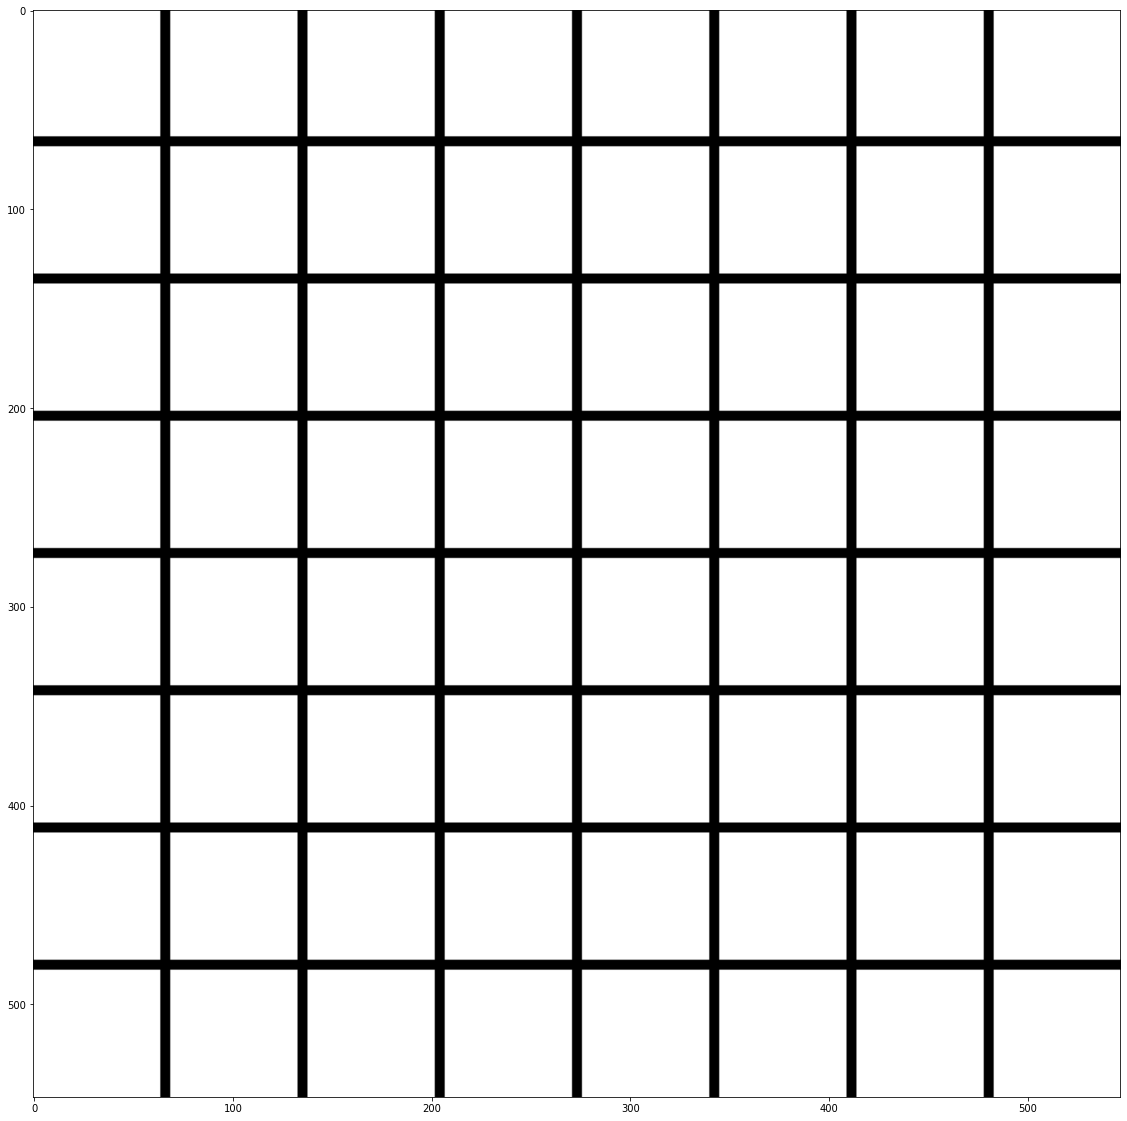

In [ ]:
layer_name = 'block1_conv1'
size = 64
margin = 5
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
for i in range(8):
  for j in range(8):
    filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start: horizontal_end,
    vertical_start: vertical_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results)

In [ ]:
#Loading the VGG16 network with pretrained weights

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

In [ ]:
#Preprocessing an input image for VGG16

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
img_path = '/content/namibia-4780251_640.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.5568886), ('n01871265', 'tusker', 0.41203448), ('n02504013', 'Indian_elephant', 0.030700546)]


In [ ]:
np.argmax(preds[0])

386

In [ ]:
#Setting up the Grad-CAM algorithm

In [ ]:
african_e66lephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')

In [ ]:
grads = K.gradients(african_e66lephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [ ]:
#Heatmap post-processing

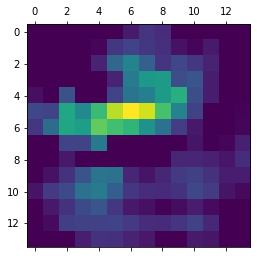

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [ ]:
#Superimposing the heatmap with the original picture

In [ ]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('/content/namibia-4780251_640.jpg', superimposed_img)

True